## Black Friday dataset EDA and feature engineering
### cleaning and preparing data for model training

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing training dataset
df_train = pd.read_csv('train.csv')

In [3]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
# import the test data
df_test = pd.read_csv('test.csv')

In [5]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [6]:
# merge both train and test dataset
final_df = df_train.append(df_test)

In [7]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [8]:
final_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
final_df.drop(['User_ID'],axis=1,inplace=True)

In [10]:
final_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [11]:
## converting Gerder categorical vairable to numeric values
pd.get_dummies(final_df['Gender'],drop_first=True)

,M
0,0
1,0
2,0
3,0
4,1
...,...
233594,0
233595,0
233596,0
233597,0


In [12]:
final_df['Gender'] = final_df['Gender'].map({'F':0,'M':1})

In [13]:
final_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [16]:
## Handle categorical feature Age
final_df['Age'].unique()

array([1, 7, 2, 3, 4, 5, 6])

In [17]:
## 1st technique
final_df['Age'] = final_df['Age'].map({'0-17':1, '55+':7, '26-35':2, '46-50':3, '51-55':4, '36-45':5, '18-25':6})

In [18]:
final_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,NaN,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,NaN,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,NaN,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,NaN,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,NaN,16,C,4+,0,8,NaN,NaN,7969.0


In [ ]:
## 2nd technique
final_df['Age'] = pd.get_dummies(final_df['Age'],drop_first=True)

In [ ]:
## 3rd technique
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

final_df['Age'] = encode.fit_transform(final_df['Age'])

In [ ]:
final_df.head()

In [19]:
## Handle categorical feature City_Category
final_df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [20]:
df_city = pd.get_dummies(final_df['City_Category'],drop_first=True)

In [21]:
df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [22]:
df = pd.concat([final_df,df_city],axis=1)

In [23]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,NaN,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,NaN,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,NaN,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,NaN,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,NaN,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [24]:
df.drop('City_Category',axis=1,inplace=True)

In [25]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,NaN,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,NaN,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,NaN,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,NaN,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,NaN,16,4+,0,8,NaN,NaN,7969.0,0,1


In [26]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                           783667
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

<AxesSubplot:>

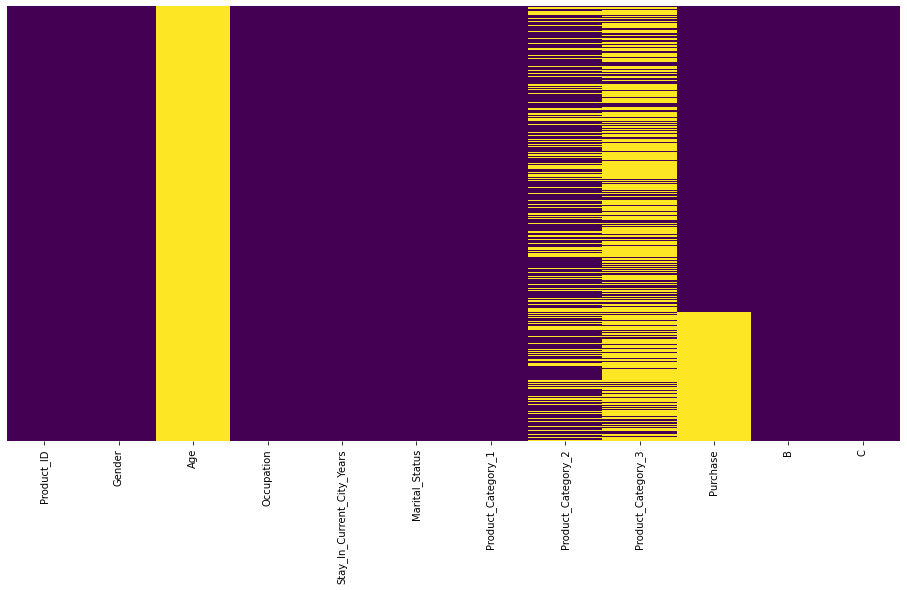

In [27]:
plt.rcParams['figure.figsize'] = (16,8)
sns.heatmap(df.isnull(),cmap=
            'viridis',yticklabels=False,cbar=False)

In [28]:
# Focus on replacing missing values
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

In [29]:
df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [30]:
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [31]:
df['Product_Category_2'].mode()[0]

8.0

In [32]:
# replacing the missing values with mode
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [33]:
df['Product_Category_2'].isnull().sum()

0

In [34]:
# replacing missing value of Product_Category_3
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [35]:
# replacing the missing values with mode
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [36]:
df['Product_Category_3'].isnull().sum()

0

In [37]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,NaN,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,NaN,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,NaN,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,NaN,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,NaN,16,4+,0,8,8.0,16.0,7969.0,0,1


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         0 non-null       float64
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(4), int64(4), object(2), uint8(2)
memory usage: 67.3+ MB


In [39]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [40]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','', regex=True)

In [41]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [42]:
##convert object into integers
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype(int)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         0 non-null       float64
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(4), int64(5), object(1), uint8(2)
memory usage: 67.3+ MB


In [44]:
df['B'] = df['B'].astype(int)
df['C'] = df['C'].astype(int)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         0 non-null       float64
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 77.7+ MB


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

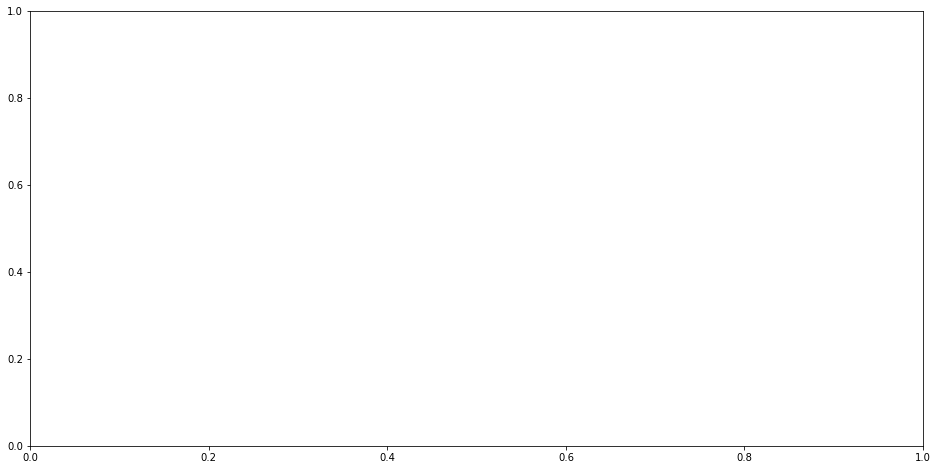

In [46]:
## Visualization Age vs Purchas
sns.barplot(x='Age',y='Purchase',data=df,hue='Gender')

#### Observation
 - purchasing of male is more than female

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

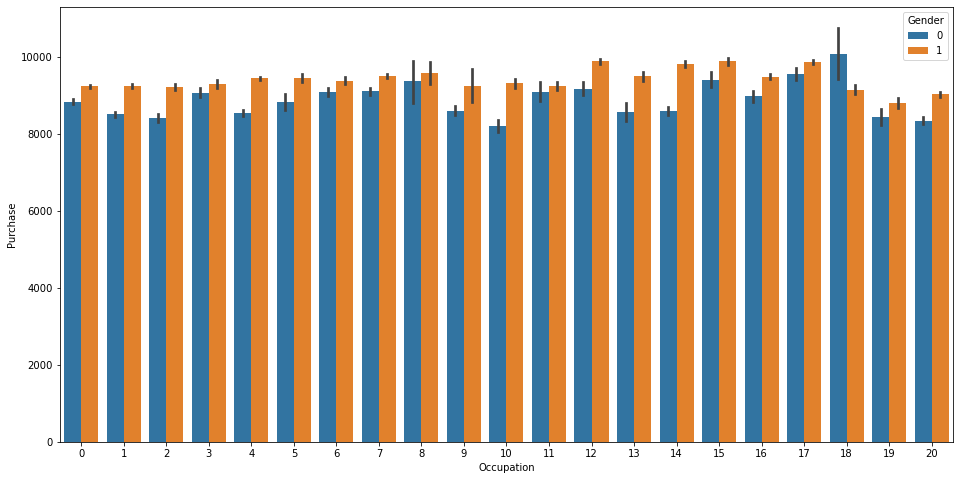

In [47]:
## Visualization of Purchase with occupation
sns.barplot(x='Occupation',y='Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

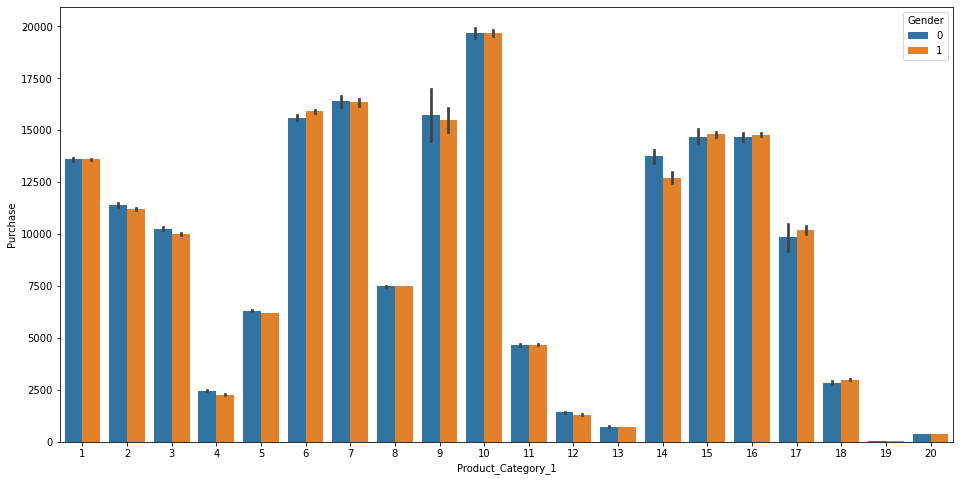

In [49]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

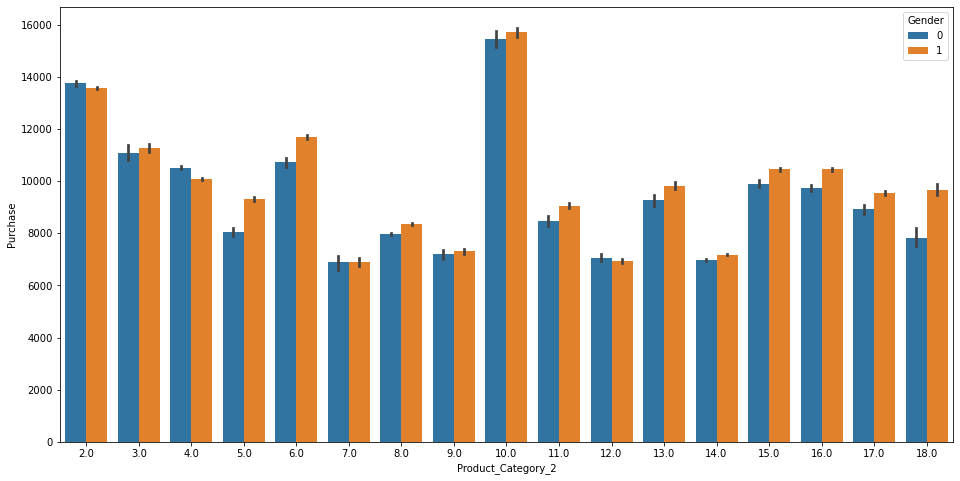

In [50]:
sns.barplot(x='Product_Category_2',y='Purchase',hue='Gender',data=df)

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

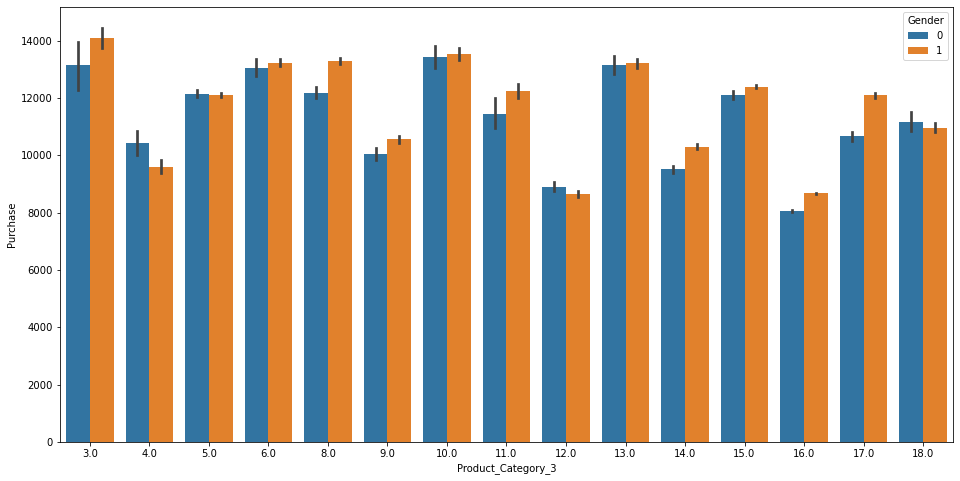

In [51]:
sns.barplot(x='Product_Category_3',y='Purchase',hue='Gender',data=df)

In [52]:
##Feature Scaling 
df_test=df[df['Purchase'].isnull()]

In [53]:
df_train = df[~df['Purchase'].isnull()]

In [54]:
X = df_train.drop('Purchase',axis=1)
y = df_train['Purchase']

In [55]:
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0,NaN,10,2,0,3,8.0,16.0,0,0
1,P00248942,0,NaN,10,2,0,1,6.0,14.0,0,0
2,P00087842,0,NaN,10,2,0,12,8.0,16.0,0,0
3,P00085442,0,NaN,10,2,0,12,14.0,16.0,0,0
4,P00285442,1,NaN,16,4,0,8,8.0,16.0,0,1


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [57]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

/home/bjit/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/home/bjit/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:847: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/home/bjit/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:689: RuntimeWarning: Degrees of freedom <= 0 for slice.
  result = op(x, *args, **kwargs)
